# City Recommender

- This notebook is a test run of the medium article series https://medium.com/@melulfrescoelias/city-recommender-system-with-python-part-1-finding-my-schitts-creek-f362646280b3
- It will be used as practice for the final project of a data analytics course, covering the same topic for european cities.

## 1. Gathering the data
### 1.1 Using csv of weather data scraped from https://www.usclimatedata.com/climate/united-states/us

In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("data/final_weather_data.csv", index_col=0)
weather.head()

,State,City,State_Abb,CityState,Jan High,Feb High,Mar High,Apr High,May High,Jun High,...,Mar Snow,Apr Snow,May Snow,Jun Snow,Jul Snow,Aug Snow,Sep Snow,Oct Snow,Nov Snow,Dec Snow
0,Alabama,Addison,AL,"Addison, AL",50.0,54.0,63.0,71.0,79.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,Alabaster,AL,"Alabaster, AL",54.0,59.0,67.0,74.0,81.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,Alexander City,AL,"Alexander City, AL",55.0,59.0,68.0,75.0,82.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alabama,Aliceville,AL,"Aliceville, AL",56.0,60.0,69.0,77.0,84.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alabama,Andalusia,AL,"Andalusia, AL",61.0,65.0,72.0,78.0,85.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.2 Using csv of general socio-economic data scraped from https://datausa.io/profile/geo and https://www.numbeo.com/quality-of-life/

In [3]:
socio_ec = pd.read_csv("data/socio_ec_datausa.csv", index_col=0)
socio_ec.head()

,City,Population,Population Change,Poverty Rate,Median Age,Median Household Income,Median Household Income Change,Number Employees,Number Employees Change,Median Property Value,...,Patient to Clinician Ratio,Foreign Born Population Ratio,Citizens Percentage,Total Degrees,Degrees Ratio M2F,Degrees per Capita,Households,People Per House,Homeownership,Commute Time
0,"Los Angeles, CA",13300000.0,-0.46700,15.80,37.1,72563.0,3.67,6620000.0,0.499,650300.0,...,1281.0,33.2,84.7,247648.0,0.724208,0.018620,4350000.0,3.057471,48.2,29.4
1,"Dallas, TX",7540000.0,1.89000,13.30,35.1,69445.0,3.06,3820000.0,2.890,238800.0,...,1670.0,17.4,88.2,84389.0,0.676980,0.011192,2620000.0,2.877863,59.1,26.8
2,"Washington, DC",6250000.0,0.55500,8.28,37.1,102180.0,2.52,3370000.0,0.729,433200.0,...,1316.0,22.2,89.5,102309.0,0.864843,0.016369,2230000.0,2.802691,63.5,32.8
3,"Philadelphia, PA",6100000.0,0.00413,13.10,38.8,70747.0,3.17,3020000.0,1.640,256400.0,...,1232.0,10.5,95.0,100077.0,0.723712,0.016406,2290000.0,2.663755,66.6,28.8
4,"Riverside, CA",4620000.0,0.91000,16.80,34.8,65671.0,5.93,2020000.0,3.810,360300.0,...,1281.0,20.9,89.9,44650.0,0.673476,0.009665,1370000.0,3.372263,64.6,31.1


### 1.3 Using csv of venue data from Foursquare's API https://developer.foursquare.com/docs/places-api/getting-started/

In [4]:
venues = pd.read_csv("data/one_hot_encoded_usa_FS.csv", index_col=0)
venues.head()

,City,Zoo Exhibit,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,...,Well,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Abbeville, GA",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Aberdeen, ID",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Aberdeen, MD",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,"Aberdeen, SD",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,"Aberdeen, WA",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Using KMeans for finding optimal clusters
### 2.1 first subset the data

In [5]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### 2.1.1 Removing unnecessary columns

In [6]:
weather_data = weather.drop("State", 1).drop("City", 1).drop("State_Abb",1)
weather_data.rename(columns={"CityState":"City"}, inplace=True)

print(weather_data.shape)

(5963, 49)


#### 2.1.2 Converting to seasonal values for average temperature, swing, precipitation and snow, instead of monthly values

In [7]:
season_months = {"summer": ["Jun", "Jul", "Aug"],
                 "fall": ["Sep", "Oct", "Nov"],
                 "winter": ["Dec", "Jan", "Feb"],
                 "spring": ["Mar", "Apr", "May"]}

In [8]:
def season_temps(season):
    months = season_months.get(season)
    avg_temp = []
    
    # get average month temp
    for i in range(0,3):
        # month is stored with abbreviated name
        avg_temp.append((weather_data[months[i] + " High"] + weather_data[months[i] + " Low"]) / 2)
    
    # get avg seasonal temp
    season_temp = (sum(avg_temp)) / 3
    
    return season_temp


In [9]:
def season_swing(season):
    months = season_months.get(season)
    swing_temp = []
    
    # get monthly swing
    for i in range(0,3):
        swing_temp.append(weather_data[months[i] + " High"] - weather_data[months[i] + " Low"])
    
    # get seasonal swing
    season_swing = (sum(swing_temp)) / 3
    
    return season_swing
 

In [10]:
def season_prec(season):
    # get avg seasonal precipitation
    months = season_months.get(season)
    
    season_prec = ((weather_data[months[0] + " Prec"] + 
                    weather_data[months[1] + " Prec"] + 
                    weather_data[months[2] + " Prec"]) / 3)
    
    return season_prec
    

In [11]:
def season_snow(season):
    # get avg seasonal snow 
    months = season_months.get(season)
    
    season_snow = ((weather_data[months[0] + " Snow"] + 
                    weather_data[months[1] + " Snow"] + 
                    weather_data[months[2] + " Snow"]) / 3)
    
    return season_snow


In [12]:
# new columns for average seasonal temperature

summer_temp = season_temps("summer")
fall_temp = season_temps("fall")
winter_temp = season_temps("winter")
spring_temp = season_temps("spring")

In [13]:
# new columns for average seasonal swing

summer_swing = season_swing("summer")
fall_swing = season_swing("fall")
winter_swing = season_swing("winter")
spring_swing = season_swing("spring")

In [14]:
# new columns for average seasonal precipitation

summer_prec = season_prec("summer")
fall_prec = season_prec("fall")
winter_prec = season_prec("winter")
spring_prec = season_prec("spring")

In [15]:
# new columns for average seasonal swing

summer_snow = season_snow("summer")
fall_snow = season_snow("fall")
winter_snow = season_snow("winter")
spring_snow = season_snow("spring")

In [16]:
new_weather = pd.concat([summer_temp, fall_temp, winter_temp, spring_temp, 
                          summer_swing, fall_swing, winter_swing, spring_swing, 
                          summer_prec, fall_prec, winter_prec, spring_prec, 
                          summer_snow, fall_snow, winter_snow, spring_snow], axis=1)

new_weather["City"] = weather_data.City

new_weather.rename(columns={0:'Summer Temp',1:'Fall Temp',2:'Winter Temp',3:'Spring Temp',
                              4:'Summer Swing',5:'Fall Swing',6:'Winter Swing',7:'Spring Swing',
                             8:'Summer Precip', 9:'Fall Precip', 10:'Winter Precip',11:'Spring Precip',
                             12:'Summer Snow', 13:'Fall Snow', 14:'Winter Snow',15:'Spring Snow'}, inplace=True)

In [17]:
new_weather.head()

,Summer Temp,Fall Temp,Winter Temp,Spring Temp,Summer Swing,Fall Swing,Winter Swing,Spring Swing,Summer Precip,Fall Precip,Winter Precip,Spring Precip,Summer Snow,Fall Snow,Winter Snow,Spring Snow,City
0,77.000000,61.166667,41.666667,59.500000,21.333333,23.666667,20.666667,23.000000,4.470000,4.363333,5.410000,5.170000,0.0,0.0,0.0,0.0,"Addison, AL"
1,79.500000,64.500000,46.333333,62.833333,19.666667,21.666667,20.000000,22.333333,4.716667,3.933333,5.293333,4.283333,0.0,0.0,0.0,0.0,"Alabaster, AL"
2,78.666667,63.500000,45.333333,61.833333,22.000000,25.000000,23.333333,26.333333,4.753333,3.990000,5.153333,4.643333,0.0,0.0,0.0,0.0,"Alexander City, AL"
3,79.833333,64.333333,45.333333,63.000000,23.000000,26.666667,25.333333,27.333333,4.480000,4.190000,5.143333,4.910000,0.0,0.0,0.0,0.0,"Aliceville, AL"
4,78.833333,65.333333,48.500000,63.166667,24.333333,29.333333,29.000000,30.333333,5.703333,4.353333,5.130000,4.803333,0.0,0.0,0.0,0.0,"Andalusia, AL"


In [18]:
X = new_weather[["Summer Temp", "Winter Temp"]]
clusters = KMeans(n_clusters=4)
clusters.fit(X)

KMeans(n_clusters=4)

In [19]:
X.assign(clusters=clusters.predict(X))

,Summer Temp,Winter Temp,clusters
0,77.000000,41.666667,2
1,79.500000,46.333333,1
2,78.666667,45.333333,1
3,79.833333,45.333333,1
4,78.833333,48.500000,1
...,...,...,...
5958,68.166667,25.666667,3
5959,69.833333,31.000000,3
5960,68.833333,19.500000,0
5961,53.166667,13.500000,0


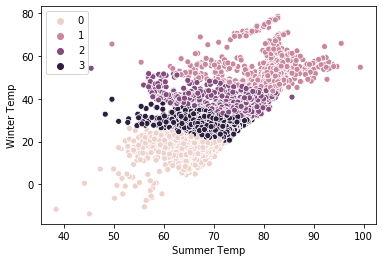

In [20]:
sns.scatterplot(data=X,
                x="Summer Temp",
                y="Winter Temp",
                hue=clusters.predict(X));

In [21]:
new_weather.columns 

Index(['Summer Temp', 'Fall Temp', 'Winter Temp', 'Spring Temp',
       'Summer Swing', 'Fall Swing', 'Winter Swing', 'Spring Swing',
       'Summer Precip', 'Fall Precip', 'Winter Precip', 'Spring Precip',
       'Summer Snow', 'Fall Snow', 'Winter Snow', 'Spring Snow', 'City'],
      dtype='object')

In [22]:
X_all = new_weather[['Summer Temp', 'Fall Temp', 'Winter Temp', 'Spring Temp',
                    'Summer Swing', 'Fall Swing', 'Winter Swing', 'Spring Swing',
                    'Summer Precip', 'Fall Precip', 'Winter Precip', 'Spring Precip',
                    'Summer Snow', 'Fall Snow', 'Winter Snow', 'Spring Snow']]

In [23]:
# Trying plot_elbow() function from NOtes on Unsupervised Learning

def plot_elbow(X):
    inertias = {}
    for k in range(1,15):
        cluster = KMeans(n_clusters=k).fit(X)
        inertias[k] = cluster.inertia_
        
    plt.figure(figsize=(10,6))
    sns.lineplot(x=list(inertias.keys()),
                 y=list(inertias.values()));
    plt.title("Optimal number of clusters")
    

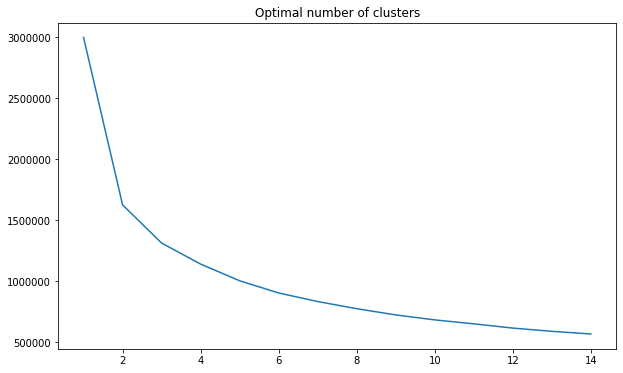

In [24]:
plot_elbow(X_all)

## 3. Now using optimised weather data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
def elbow_kmeans_city(data, maxRange=10):
    try:
        X_w = data.drop("City",1)
        X_w = MinMaxScaler().fit_transform(X_w)
    except:
        X_w = MinMaxScaler().fit_transform(data)
        
    Error = []
    for i in range(1, maxRange + 1):
        kmeans = KMeans(n_clusters = i).fit(X_w)
        kmeans.fit(X_w)
        Error.append(kmeans.inertia_)
        
    plt.plot(range(1, maxRange + 1), Error)
    plt.title("Optimal no. of clusters")
    plt.show();
        
    return (X_w)
        

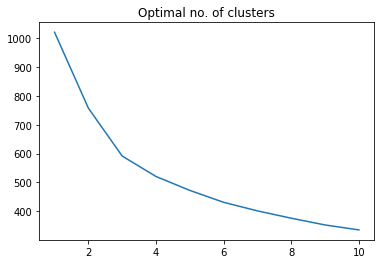

array([[0.63287671, 0.7016317 , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.6739726 , 0.74825175, 0.65045045, ..., 0.        , 0.        ,
        0.        ],
       [0.66027397, 0.73426573, 0.63963964, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49863014, 0.47319347, 0.36036036, ..., 0.1038961 , 0.07655502,
        0.04964539],
       [0.24109589, 0.33333333, 0.2954955 , ..., 0.        , 0.        ,
        0.        ],
       [0.5260274 , 0.54079254, 0.48108108, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
elbow_kmeans_city(new_weather, 10)

# 4. There is already a preprocessed csv of all data, which will be used for modelling


In [28]:
all_data = pd.read_csv('https://s3.us-east-2.amazonaws.com/www.findingmyschittscreek.com/Data/allDataCombined.csv', 
                       index_col=0)

all_data.head()

,City,Population,Median Household Income,Median Property Value,Median Age,Homeownership,Commute Time,Health Care,Safety,Pollution,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,lat,lng,density
0,"Los Angeles, CA",3646.916506,269.375203,806.411805,37.1,48.2,29.4,62.62,53.53,66.34,...,0,0,0,0,0,0,0,34.1139,-118.4068,3295.0
1,"Washington, DC",2500.000000,319.656065,658.179307,37.1,63.5,32.8,71.76,42.45,39.24,...,3,0,0,0,0,2,0,38.9047,-77.0163,4382.0
2,"Philadelphia, PA",2469.817807,265.983082,506.359556,38.8,66.6,28.8,70.06,39.16,50.45,...,0,0,0,1,0,0,0,40.0077,-75.1339,4547.0
3,"Seattle, WA",1984.943324,296.496206,698.140387,37.0,59.8,29.5,73.69,52.37,27.95,...,1,0,0,0,0,4,0,47.6211,-122.3244,3336.0
5,"Minneapolis, MN",1905.255888,282.095728,520.192272,37.3,70.0,24.0,78.45,49.88,26.67,...,0,0,0,0,0,1,0,44.9635,-93.2678,3019.0


In [29]:
all_data = all_data[all_data["Population"] > 130]
all_data = all_data.reset_index(drop=True)

In [30]:
all_data.shape

(303, 639)

# 5. Linear model for weights

In [31]:
from sklearn.linear_model import Ridge, LinearRegression

In [32]:
target = all_data[["Median Household Income"]]
target = MinMaxScaler().fit_transform(target)

predictors = all_data.drop(["City", "Median Household Income", "Homeownership", "lat", "lng"], axis=1)
X = MinMaxScaler().fit_transform(predictors)

In [33]:
reg = Ridge().fit(X, target)
reg.score(X, target)

0.9642832887195172

In [34]:
xxx = [i for i in reg.coef_]
xxx[0][1] = xxx[0][1]/5

In [35]:
coefficients = xxx
X = X * coefficients

# 6. Putting values back into df format

In [36]:
norm_df = pd.DataFrame(X)
colNames = list(predictors.columns)

names_norm = {}

for i in range(0, len(colNames)):
    names_norm[i] = colNames[i]
    
norm_df = norm_df.rename(columns=names_norm)
norm_df.insert(0, "City", all_data.City)

# delete duplicates
norm_df.drop_duplicates("City", inplace=True)

# I honestly do not understand why the next three lines of code, but for the sake of the tutorial
# and time pressure, I will use it. The author simple wrote "because of bias"
# I assume the author forgot to adjust the first line
medval = norm_df["Median Property Value"]
norm_df.drop("Median Property Value", 1)
norm_df['Median Property Value'] = medval

# Author does not explain why the multiply population by 1.5
pop = (norm_df["Population"])*1.5
norm_df.drop("Population", 1)
norm_df["Population"] = pop

norm_df.head()

,City,Population,Median Property Value,Median Age,Commute Time,Health Care,Safety,Pollution,Summer Temp,Fall Temp,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,density
0,"Los Angeles, CA",0.107459,0.025957,0.044300,0.086313,0.013948,0.006723,-0.020365,-0.004250,-0.030698,...,0.0,0.0,0.000000,-0.0,-0.0,0.000000,-0.0,0.000000,0.0,-0.015852
1,"Washington, DC",0.072403,0.019314,0.044300,0.102006,0.016999,0.004647,-0.012046,-0.006787,-0.024103,...,0.0,0.0,0.027766,-0.0,-0.0,0.000000,-0.0,0.016830,0.0,-0.021296
2,"Philadelphia, PA",0.071481,0.012511,0.049097,0.083543,0.016431,0.004030,-0.015487,-0.007104,-0.024463,...,0.0,0.0,0.000000,-0.0,-0.0,0.004243,-0.0,0.000000,0.0,-0.022123
3,"Seattle, WA",0.056660,0.021105,0.044018,0.086774,0.017643,0.006505,-0.008580,-0.002664,-0.021105,...,0.0,0.0,0.009255,-0.0,-0.0,0.000000,-0.0,0.033660,0.0,-0.016058
4,"Minneapolis, MN",0.054225,0.013131,0.044864,0.061388,0.019231,0.006039,-0.008187,-0.005265,-0.017388,...,0.0,0.0,0.000000,-0.0,-0.0,0.000000,-0.0,0.008415,0.0,-0.014470


# 7. Now it's time to implement the actual recommender
## 7.1 we are using cosine similarity

In [37]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
# function that calculates cosine similarity between cities

def from_city_cosSim(data, name):
    try:
        Xs = data[data.City == name].drop("City",1)
        Col_A = data[data.City != name].City
        Ys = data[data.City != name].drop("City", 1)
        
        cosSim = cosine_similarity(X=Xs, Y=Ys)
        sim = list(cosSim[0])
        cty = list(Col_A)
        comb = {"City":name, "Similarity":1}
        dfdf = pd.DataFrame(comb).reset_index()
        
        # adding row with the Y City
        currCity = {"City":name, "Similarity":1}
        curr = pd.DataFrame(currCity, index=[0])
        
        # Concatenate to finalize DF
        dfdf = pd.concat([dfdf, curr],
                         sort=False).reset_index(drop=True).drop("index", 1)
        return (dfdf)
    
    except:
        print("Wrong input: this entry will be ignored")

In [42]:
from_city_cosSim(norm_df, "Los Angeles, CA")

Wrong input: this entry will be ignored
